In [127]:
# Generate data
import numpy as np

def generateData(μ1=-10, μ2=10, σ1=2, σ2=5, N=1000, p=0.5):
    indicators = np.random.binomial(1, p, size=N)
    values = []
    for ind in indicators:
        if ind==0:
            values.append(np.random.normal(μ1, σ1))
        else:
            values.append(np.random.normal(μ2, σ2))
    return np.array(values)

values = generateData()

In [128]:
values

array([ 5.02117208e+00, -8.44567625e+00, -6.99846960e+00,  1.52708080e+00,
       -1.05267751e+01,  2.51903040e+01,  1.46193696e+01,  1.07472858e+01,
       -1.11162577e+01,  1.50130469e+01, -9.10392572e+00, -8.79596017e+00,
        6.36190300e+00, -6.62993261e+00, -1.05913453e+01,  9.84421160e+00,
       -9.64207314e+00, -8.85361696e+00,  2.63464546e+00,  6.94008189e+00,
       -6.57949018e+00, -1.07662168e+01, -1.12137293e+01,  1.45630207e+01,
       -1.00754508e+01,  4.58116210e+00, -8.85632653e+00, -1.13246866e+01,
       -9.99972322e+00,  1.04626483e+01,  1.37612836e+01, -9.48101483e+00,
        1.94197928e+01,  9.54508464e+00, -8.19350703e+00, -1.28820597e+01,
        2.87103548e+00, -9.42534829e+00, -1.41908591e+01,  1.16191887e+01,
       -8.71057439e+00,  1.99783122e+01, -7.88406592e+00, -9.33396344e+00,
        1.86278982e+01,  1.56386435e+01, -1.13704821e+01, -6.85876645e+00,
        1.24388335e+01,  4.11144993e+00,  1.70946431e+01, -8.95278595e+00,
        1.01327014e+01, -

In [129]:
def histogramEstimator(testval, values, N=50):
    x0 = np.min(values)
    xT = np.max(values)    
    binCutOffs = np.linspace(x0,xT,N)
    binSize = binCutOffs[1] -  binCutOffs[0]
    binCounts = [0 for i in range(N)]
    
    for val in values:
        for i in range(N):
            if (val>=binCutOffs[i-1]) & (val<binCutOffs[i]):
                binCounts[i] += 1
          
    #print(x0,xT,N,binSize)
    #print(binCutOffs)
    #print(binCounts)
    
    binIdx = None
    for i in range(N):
        #print(i, testval, binCutOffs[i-1], binCutOffs[i], (testval>=binCutOffs[i-1]) & (testval<binCutOffs[i]))
        if (testval>=binCutOffs[i-1]) & (testval<binCutOffs[i]):
            binIdx = i
        elif testval<x0:
            binIdx = 0
        elif testval>=xT:
            binIdx = N-1
                
    return 1/(N*binSize) * binCounts[binIdx]

histogramEstimator(50, values)

0.024054577690133

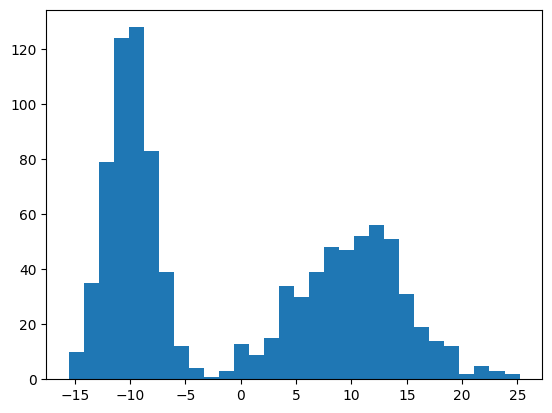

In [130]:
plt.hist(values, bins=30)
plt.show()

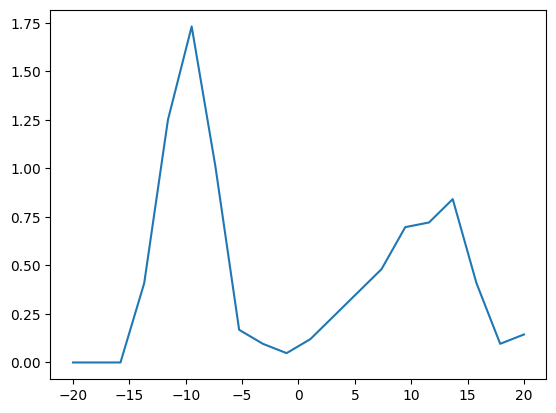

In [131]:
X = np.linspace(-20,20,20)
f_X = [histogramEstimator(i,values) for i in X]
plt.plot(X, f_X)